In [2]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model = InceptionV3(weights='imagenet')

96116736/96112376 [==============================] - 4s 0us/step


mouse.jpg


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


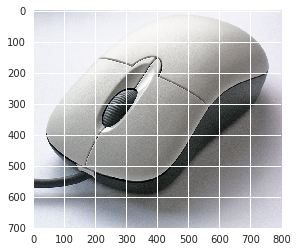

(1, 701, 800, 3) 255.0 0.0
40960/35363 [==================================] - 0s 1us/step
                1     2
0           mouse  0.11
1          vacuum  0.00
2  remote_control  0.00
3        joystick  0.00
4      microphone  0.00
stapler.jpg


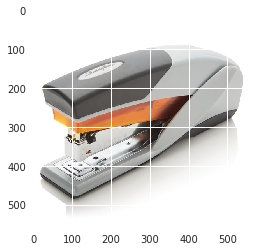

(1, 560, 560, 3) 255.0 0.0
                 1     2
0          printer  0.01
1            mouse  0.01
2            radio  0.00
3         joystick  0.00
4  Polaroid_camera  0.00


In [4]:
img_dir = '../images'
for my_image in os.listdir(img_dir):
    img = image.load_img(img_dir + '/' + my_image)
    print(my_image)
    tmp = plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    print(x.shape, x.max(), x.min())
    x = preprocess_input(x)
    y = model.predict(x)
    
    df = pd.DataFrame(decode_predictions(y,top=5)[0])
    df = df.drop(0,axis=1).round(2)
    print(df)
    df